# Emilia Romagna's tourism: a summary analysis.

I think the aspects of art history that interest me the most, such as curatorial or museographer, are not related to data analysis but more to the physical experience within cultural institutions. However, one path I have always thought of pursuing, and not far from what I am passionate about, is that of cultural heritage (conservation, maintenance, valorisation, etc.). In this notebook, I will firstly analyse datasets showing cultural places and gastronomic outlets in the region in Italy from which I come. Both were downloaded from the __[Open Data Emilia-Romagna](https://dati.emilia-romagna.it)__ platfrom. Afterwards, I found on the Istituto Nazionale di Statistica (__[ISTAT](http://dati.istat.it)__) datatabase, probably the most useful dataset for an investigation of this kind, showing the tourism figures for the years 2019-2020-2021 broken down by province. 

## Foregoing - Before we start

I imported all the pyhton libraries that might be useful.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

I changed the pandas display parameter, as in some cases is useful to have a full view of what you're working with.

In [49]:
pd.set_option('display.max_rows', None)

### Read the file into a pd.DataFrame

In [50]:
EM_ArteCultura = pd.read_csv('./Regione-Emilia-Romagna---Arte-e-cultura.csv', 
                             sep=';', quotechar='"', encoding="ISO-8859-1") #engine='python', on_bad_lines='skip'

It is not always easy and straightforward. Indeed, the exploration of this dataset began with figuring out how to open it effectively using pandas. First I had to specify which characters were used as delimiters, the ';' instead of the ',', and as quotations, in addition the UTF-8 encoding seemed not to work and that is why I used encoding='ISO-8859-1'. In commentary I left two other parameters I came across for troubleshooting which proved useful in some cases.

Once I had overcome the first hurdle, I was able to take a first look at my 'work table'. Since I removed the 'max_rows' parameter, trying to display the entire data frame was not convenient in my situation. I therefore used the `.head()` function, but `.sample()` is also a valid possibility. 

In [51]:
EM_ArteCultura.head()

,Comune,Provincia,Nome,Descrizione,Scheda,Immagine,Descrizione immagine,Sottofamiglia,Indirizzo,Localita,Redazione locale,Data di esportazione,Latitudine,Longitudine
0,AGAZZANO,PIACENZA,ROCCA e CASTELLO di AGAZZANO,Complesso fortificato in cui l'austerità medio...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,ROCCA e CASTELLO di AGAZZANO,"CASTELLI, TORRI, CAMPANILI",via del Castello - Agazzano (PC),NaN,Piacenza,42184,44.947254,9.522221
1,AGAZZANO,PIACENZA,SANTUARIO DI NOSTRA SIGNORA DEL PILASTRELLO,"Situato in territorio di Agazzano, sulle rive ...",http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/media/zoo...,SANTUARIO DI NOSTRA SIGNORA DEL PILASTRELLO,"ABBAZIE, MONASTERI, SANTUARI",località Pilastrello - Agazzano (PC),NaN,Piacenza,42184,44.942363,9.527886
2,ALSENO,PIACENZA,ABBAZIA DI CHIARAVALLE DELLA COLOMBA,L'Abbazia fu edificata su sollecitazione di Sa...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,ABBAZIA DI CHIARAVALLE DELLA COLOMBA,"ABBAZIE, MONASTERI, SANTUARI","Via Centro, 35 - Alseno (PC)",NaN,Piacenza,42184,44.926313,9.973011
3,ALSENO,PIACENZA,CASTELLO DI CASTELNUOVO FOGLIANI,Posto sulla sommità di un piccolo colle isolat...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,CASTELLO DI CASTELNUOVO FOGLIANI,"CASTELLI, TORRI, CAMPANILI",Via della Posta - Alseno (PC),NaN,Piacenza,42184,44.875640,9.975886
4,BETTOLA,PIACENZA,CAPPELLA DELL'APPARIZIONE,La Cappella venne costruita nel 1954 in locali...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,CAPPELLA DELL'APPARIZIONE,"CAPPELLE, ORATORI, TABERNACOLI",Località i Frati - Bettola (PC),NaN,Piacenza,42184,NaN,NaN


Just for extra safety i checked if there were any duplicated rows. I checked the lines in general because in the names of monuments the repetition of some could not be excluded. Names like 'Chiesa di Santa Maria Assunta' are very popular in Italy and therefore churches in different cities may have the same name. 

In [52]:
EM_ArteCultura.shape == EM_ArteCultura.drop_duplicates().shape

True

Some provinces names were not ideal so I changed them.

In [53]:
EM_ArteCultura.loc[EM_ArteCultura['Provincia'] == "CITTA' METROPOLITANA DI BOLOGNA"] = EM_ArteCultura.loc[EM_ArteCultura['Provincia'] == "CITTA' METROPOLITANA DI BOLOGNA"].replace({"CITTA' METROPOLITANA DI BOLOGNA" : 'BOLOGNA'})
EM_ArteCultura.loc[EM_ArteCultura['Provincia'] == "FORLI'"] = EM_ArteCultura.loc[EM_ArteCultura['Provincia'] == "FORLI'"].replace({"FORLI'" : 'FORLÌ-CESENA'})

## Actual analysis 

Bologna appears to be the province with the highest number of registered monuments.

In [54]:
EM_ArteCultura['Provincia'].value_counts()

BOLOGNA          723
MODENA           637
REGGIO EMILIA    616
FORLÌ-CESENA     591
RAVENNA          505
PARMA            306
PIACENZA         282
RIMINI           282
FERRARA          155
Name: Provincia, dtype: int64

So what is the percentage of monuments that each provinces hosts? 

In [55]:
EM_ArteCultura['Provincia'].value_counts() / EM_ArteCultura.shape[0] * 100

BOLOGNA          17.647059
MODENA           15.547962
REGGIO EMILIA    15.035392
FORLÌ-CESENA     14.425189
RAVENNA          12.326092
PARMA             7.468880
PIACENZA          6.883085
RIMINI            6.883085
FERRARA           3.783256
Name: Provincia, dtype: float64

Which 'Sottofamiglia' and therefore type of monument is most present in Emilia Romagna?

In [56]:
EM_ArteCultura['Sottofamiglia'].value_counts()

CHIESE, PIEVI, BATTISTERI         974
MUSEI, GALLERIE                   539
VILLE , DIMORE, TEATRI STORICI    462
CASTELLI, TORRI, CAMPANILI        330
BORGHI                            279
CAPPELLE, ORATORI, TABERNACOLI    220
PIAZZE, LOGGE, VIE STORICHE       210
MONUMENTI ALLA MEMORIA            192
OPERE ARTISTICHE                  166
ABBAZIE, MONASTERI, SANTUARI      158
FONTANE, PONTI, CANALI            112
CASE COLONICHE, MULINI             94
ARCHI, PORTE, MURA, PORTICI        89
ARCHITETTURA MODERNA               74
SITI ARCHEOLOGICI                  56
GIARDINI, PARCHI STORICI           54
ARCHEOLOGIA INDUSTRIALE            43
BIBLIOTECHE STORICHE               34
PATRIMONIO UNESCO                  11
Name: Sottofamiglia, dtype: int64

Visualising the types of cultural places in this region, I realised that one of them is related to UNESCO places. However, being so poorly represented means that only a few provinces are home to UNESCO sites. Which are they?

Text(0, 0.5, 'No. of UNESCO Sites')

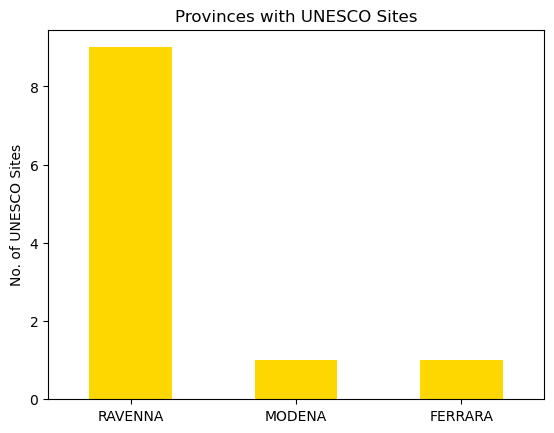

In [57]:
unesco_provinces = EM_ArteCultura.loc[EM_ArteCultura['Sottofamiglia'] == 'PATRIMONIO UNESCO', 'Provincia'].value_counts()
unesco_provinces.plot(title= 'Provinces with UNESCO Sites', 
                      kind='bar',
                      color='gold',
                      rot=0)
plt.ylabel("No. of UNESCO Sites")

Not only can you see from this visualisation that only three of the nine provinces in this region host UNESCO sites, but above all that Ravenna hosts no less than nine of a total of 11. 

### Final Remarks

In fairness, however, I must point out how the EM_ArteCultura dataset could categorise its data better. In fact, although the value on line 1923 with the name 'I Portici di Bologna' is not categorised in the Sottofamiglia == 'PATRIMONIO UNESCO' it does belong there; this is probably because the attribution of this title to the Portici is only two years old. I do not know if others or how many others sites are incorrectly categorised.

In [58]:
#EM_ArteCultura.loc[EM_ArteCultura['Nome'] == "I Portici di Bologna"].replace({'ARCHI, PORTE, MURA, PORTICI' : 'PATRIMONIO UNESCO'})
EM_ArteCultura.iloc[1923] = EM_ArteCultura.iloc[1923].replace({'ARCHI, PORTE, MURA, PORTICI' : 'PATRIMONIO UNESCO'})

In [59]:
EM_ArteCultura.loc[EM_ArteCultura['Sottofamiglia'] == 'PATRIMONIO UNESCO', 'Provincia'].value_counts()

RAVENNA    9
MODENA     1
BOLOGNA    1
FERRARA    1
Name: Provincia, dtype: int64

> **Nonetheless, Ravenna stiil remains the province with the most UNESCO sites!** 

## Further insights

It may also be useful to perhaps combine a dataset containing tourism-related figures or geography data.

In fact, I first scraped a webpage to get the surface area data of each municipality in the region, in order to calculate the proportion of monuments to the surface area. However, I realised afterwards that the municipalities were not correctly subdivided in the monument dataset, so I later decided to use the area of the provinces. 

In [60]:
import requests 
from bs4 import BeautifulSoup
import string

In [61]:
def Html_transmittor(Link):
    Response = requests.get(Link)
    Html_string1 = Response.text
    return BeautifulSoup(Html_string1, "html.parser")

In [62]:
superfici_comuni = str(Html_transmittor('https://sasweb.regione.emilia-romagna.it/statistica/Elenchi.do?tabella=8')\
                              .find("table", attrs={"class": "tabellaNuova"}).find_all('td'))\
.replace('<td>', '').replace('</td>,', '').replace('[', '').replace('</td>]', '').replace(',', '.'). split()


def numeri_superfici(lista):
    floating = []
    for numero in lista:
        floating.append(float(numero))
    return floating

superfici_comuni_df = pd.DataFrame({'Superficie Comune km2' : numeri_superfici(superfici_comuni)})


nomi_comuni = str(Html_transmittor('https://sasweb.regione.emilia-romagna.it/statistica/Elenchi.do?tabella=8').\
                  find("table", attrs={"class": "tabellaNuova"}).find_all('th')).\
replace('<th>', '').replace('</th>]', '').split('</th>, ')

nomi_comuni.pop(0)

nomi_comuni.pop(0)

#I needed this function because in the downloaded datasets the names of the provinces are
#all in capital letters and if I wanted to merge along this axis I needed the values to be equal.
def upper(lista): 
    uppers = []
    for nome in lista:
        uppers.append(nome.upper())
    return uppers

nomi_comuni_df = pd.DataFrame({'Comune' : upper(nomi_comuni)})


comuni_superficie = pd.concat([superfici_comuni_df, nomi_comuni_df], axis=1)

In [63]:
superfici_province = str(Html_transmittor('https://www.tuttitalia.it/emilia-romagna/89-province/superficie/').\
                         find_all("td", attrs={"class": "cw"})).replace('<td class="cw">', '').replace('</td>]', '')\
.replace('[', '').replace('.','').replace(',', '.').split("</td>. ")

province = "Bologna, Parma, Modena, Ferrara, Piacenza, Forlì-Cesena, Reggio Emilia, Ravenna, Rimini".split(', ')

province_superficie = pd.concat([pd.DataFrame({'Provincia' : upper(province)}), \
                                 pd.DataFrame({'Superficie Provincia km2' : numeri_superfici(superfici_province)})], axis=1)

province_superficie 

,Provincia,Superficie Provincia km2
0,BOLOGNA,3702.25
1,PARMA,3447.40
2,MODENA,2687.88
3,FERRARA,2627.38
4,PIACENZA,2585.76
5,FORLÌ-CESENA,2378.32
6,REGGIO EMILIA,2291.15
7,RAVENNA,1859.39
8,RIMINI,865.01


By combining the obtained areas of each province with the datasets containing monuments and restaurants data, the 'density' of monuments and/or restaurants in each province can be analysed. 

In [64]:
EM_Enogastronomia = pd.read_csv('./Regione-Emilia-Romagna---Enogastronomia-i-luoghi-del-gusto.csv', 
                                sep=';', quotechar='"', encoding="ISO-8859-1") #engine='python', on_bad_lines='skip'

This dataset does not contain any examples belonging to the province of Ferrara, in fact I had to choose to use a different dataset in order to have a more comprehensive view.

In [65]:
EM_Enogastronomia['Provincia'].value_counts()

CITTA' METROPOLITANA DI BOLOGNA    75
MODENA                             52
PARMA                              23
REGGIO EMILIA                      10
PIACENZA                            7
FORLI'                              6
RAVENNA                             5
RIMINI                              4
Name: Provincia, dtype: int64

In [66]:
#This dataset records restaurants rather than gastronomic places like the previous one. 
EM_Mangiare = pd.read_csv('./Regione-Emilia-Romagna---Dove-mangiare.csv',
                          sep=';', quotechar='"', encoding="ISO-8859-1", on_bad_lines='skip')

In [67]:
EM_Mangiare.head()

,Comune,Provincia,Nome,Descrizione,Scheda,Immagine,Descrizione immagine,Sottofamiglia,Indirizzo,Localita,Redazione locale,Data di esportazione,Latitudine,Longitudine
0,ALSENO,PIACENZA,AGRITURISMO LA RONDANINA,Ambiente esclusivo dove assaporare le gustose ...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/media/zoo...,AGRITURISMO LA RONDANINA,"RISTORANTI, PIZZERIE, AGRITURISMI",Via Sandrone 231 - Alseno (PC),NaN,Piacenza,42184,44.873724,9.966273
1,ALSENO,PIACENZA,AGRITURISMO MONTA' DELL'ORTO,"Cucina tipica.Prezzo medio: 30,00 Euro",http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/media/zoo...,AGRITURISMO MONTA' DELL'ORTO,"RISTORANTI, PIZZERIE, AGRITURISMI",Strada Salsediana 3573 - Alseno (PC),NaN,Piacenza,42184,44.872781,9.974384
2,ALSENO,PIACENZA,RISTORANTE IL COLLE,Ristorante con Pizzeria e PiscinaMercoledi ser...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/media/zoo...,RISTORANTE IL COLLE,"RISTORANTI, PIZZERIE, AGRITURISMI",Castelnuovo Fogliani - Alseno (PC),NaN,Piacenza,42184,44.851700,9.950469
3,BESENZONE,PIACENZA,AGRITURISMO LE COLOMBAIE,Un?antica dimora rurale sapientemente restaura...,http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/images/st...,AGRITURISMO LE COLOMBAIE,"RISTORANTI, PIZZERIE, AGRITURISMI","Via Bersano, 32, 29010 - Besenzone (PC)",NaN,Piacenza,42184,44.980919,10.015841
4,BESENZONE,PIACENZA,LA FIASCHETTERIA,"Nelle Terre Verdiane, a 1,5 km da Villa Verdi....",http://turismo.provincia.piacenza.it/index.php...,http://turismo.provincia.piacenza.it/media/zoo...,LA FIASCHETTERIA,"RISTORANTI, PIZZERIE, AGRITURISMI",Via Bersano 59 bis - Besenzone (PC),NaN,Piacenza,42184,44.983575,10.010540


In this case too, I checked if there were duplicated rows. Again, I checked the rows in general because there are restaurants with the same name but in different places. 

In [68]:
EM_Mangiare.shape == EM_Mangiare.drop_duplicates().shape

True

In [69]:
EM_Mangiare['Provincia'].value_counts()

RIMINI                             908
CITTA' METROPOLITANA DI BOLOGNA    785
MODENA                             723
RAVENNA                            631
FERRARA                            575
PARMA                              563
REGGIO EMILIA                      374
FORLI'                             357
PIACENZA                           203
Name: Provincia, dtype: int64

Again, the names of the provinces should be fixed, also to allow the two datasets to merge correctly.

In [70]:
EM_Mangiare.loc[EM_Mangiare['Provincia'] == "CITTA' METROPOLITANA DI BOLOGNA"] = EM_Mangiare.loc[EM_Mangiare['Provincia'] == "CITTA' METROPOLITANA DI BOLOGNA"].replace({"CITTA' METROPOLITANA DI BOLOGNA" : 'BOLOGNA'})
EM_Mangiare.loc[EM_Mangiare['Provincia'] == "FORLI'"] = EM_Mangiare.loc[EM_Mangiare['Provincia'] == "FORLI'"].replace({"FORLI'" : 'FORLÌ-CESENA'})

In order to work more agilely, I chose to create a separate DataFrame with the number of monuments, the number of restaurants and the surface area of each province of the region Emilia Romagna.

In [71]:
densita_monumenti_ristoranti = pd.concat([pd.DataFrame({'Monumenti': EM_ArteCultura['Provincia'].value_counts()}),\
                                          pd.DataFrame({'Ristoranti': EM_Mangiare['Provincia'].value_counts()}), \
                                          province_superficie.set_index('Provincia')], axis=1)

In [72]:
print((densita_monumenti_ristoranti['Monumenti'] / densita_monumenti_ristoranti ['Superficie Provincia km2']).sort_values(ascending=False))
print((densita_monumenti_ristoranti['Ristoranti'] / densita_monumenti_ristoranti ['Superficie Provincia km2']).sort_values(ascending=False))
print(((densita_monumenti_ristoranti['Monumenti'] + densita_monumenti_ristoranti['Ristoranti'])/ densita_monumenti_ristoranti['Superficie Provincia km2']).sort_values(ascending=False))

RIMINI           0.326008
RAVENNA          0.271594
REGGIO EMILIA    0.268861
FORLÌ-CESENA     0.248495
MODENA           0.236990
BOLOGNA          0.195287
PIACENZA         0.109059
PARMA            0.088763
FERRARA          0.058994
dtype: float64
RIMINI           1.049699
RAVENNA          0.339359
MODENA           0.268985
FERRARA          0.218849
BOLOGNA          0.212033
PARMA            0.163311
REGGIO EMILIA    0.163237
FORLÌ-CESENA     0.150106
PIACENZA         0.078507
dtype: float64
RIMINI           1.375707
RAVENNA          0.610953
MODENA           0.505975
REGGIO EMILIA    0.432097
BOLOGNA          0.407320
FORLÌ-CESENA     0.398601
FERRARA          0.277843
PARMA            0.252074
PIACENZA         0.187566
dtype: float64


Let's visualise these results through graphs:

<AxesSubplot:title={'center':'Monuments Density'}>

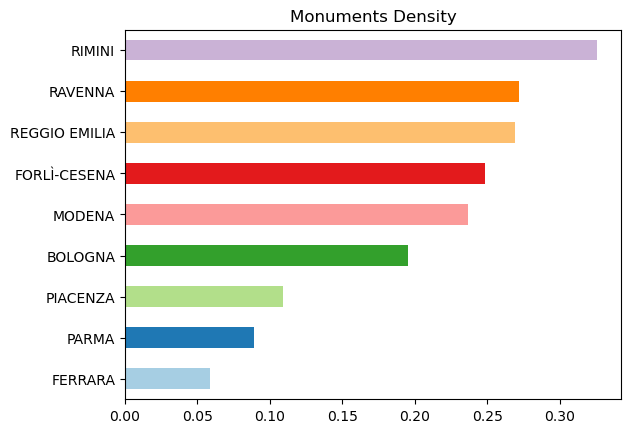

In [73]:
(densita_monumenti_ristoranti['Monumenti'] / densita_monumenti_ristoranti ['Superficie Provincia km2']).sort_values().plot(kind='barh', title='Monuments Density', color=plt.cm.Paired(np.arange(len(densita_monumenti_ristoranti))))

<AxesSubplot:title={'center':'Restaurants density'}>

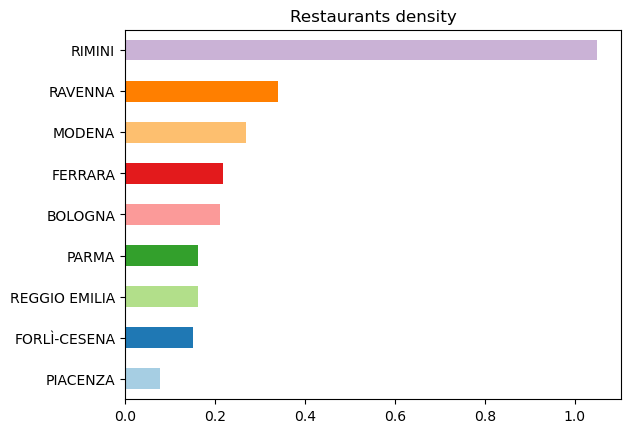

In [74]:
(densita_monumenti_ristoranti['Ristoranti'] / densita_monumenti_ristoranti ['Superficie Provincia km2']).sort_values().plot(kind='barh', title='Restaurants density', color=plt.cm.Paired(np.arange(len(densita_monumenti_ristoranti))))

<AxesSubplot:title={'center':'Monuments & Restaurants density'}>

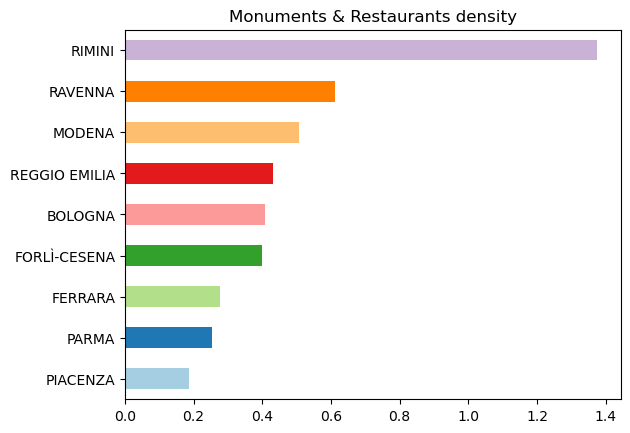

In [75]:
((densita_monumenti_ristoranti['Monumenti'] + densita_monumenti_ristoranti['Ristoranti'])/ densita_monumenti_ristoranti['Superficie Provincia km2']).sort_values().plot.barh(title='Monuments & Restaurants density', color=plt.cm.Paired(np.arange(len(densita_monumenti_ristoranti))))

<AxesSubplot:title={'center':'Monuments Density - Restaurant Density comparison'}>

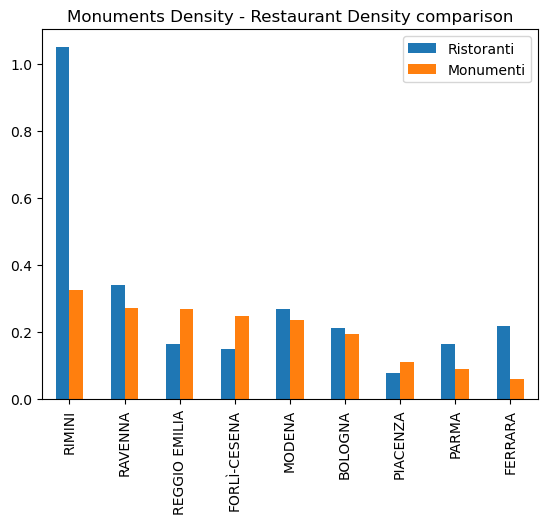

In [76]:
pd.concat([pd.DataFrame({'Ristoranti': densita_monumenti_ristoranti['Ristoranti'] / densita_monumenti_ristoranti['Superficie Provincia km2']}), \
           pd.DataFrame({'Monumenti': densita_monumenti_ristoranti['Monumenti'] / densita_monumenti_ristoranti['Superficie Provincia km2']})], axis=1).\
sort_values(by='Monumenti', ascending=False).plot.bar(title='Monuments Density - Restaurant Density comparison')

These graphs do not take into account the surface area of the monuments. For example, although the province of Ferrara is in last place in the monument density visualisation, it is fair to specify that it is home to part of the Parco del Delta del Po, which has a vast surface area. 

## Tourism Figures 

In [77]:
turismo_regioni = pd.read_csv('./DCSC_TUR_12012023223411087.csv')

In [78]:
turismo_regioni.sample(5)

,ITTER107,Territorio,TIPO_DATO7,Indicatori,CORREZ,Correzione,TIPO_ALLOGGIO2,Tipologia di esercizio,ATECO_2007,Ateco 2007,ISO,Paese di residenza dei clienti,TIME,Seleziona periodo,Value,Flag Codes,Flags
18929,ITE1A,Grosseto,AR,arrivi,N,dati grezzi,OTHER,esercizi extra-alberghieri,551_553,"alberghi e strutture simili, alloggi per vacan...",WRL_X_ITA,Paesi esteri,2020-01,Gen-2020,461.0,NaN,NaN
56562,ITF41,Foggia,AR,arrivi,N,dati grezzi,OTHERACC,altri esercizi ricettivi,551_553,"alberghi e strutture simili, alloggi per vacan...",IT,Italia,2019,2019,3800.0,NaN,NaN
50005,ITC43,Lecco,NI,presenze,N,dati grezzi,HOTELLIKE,esercizi alberghieri,551_553,"alberghi e strutture simili, alloggi per vacan...",IT,Italia,2020-12,Dic-2020,3365.0,NaN,NaN
83274,ITE44,Latina,NI,presenze,N,dati grezzi,OTHER,esercizi extra-alberghieri,551_553,"alberghi e strutture simili, alloggi per vacan...",IT,Italia,2020-05,Mag-2020,1526.0,NaN,NaN
86963,ITF43,Taranto,NI,presenze,N,dati grezzi,HOTELLIKE,esercizi alberghieri,551_553,"alberghi e strutture simili, alloggi per vacan...",WORLD,Mondo,2021,2021,782484.0,NaN,NaN


While working with the dataset, I realised that in the 'TIME' column are also included the years in total in addition to the breakdown of the months. It is not optimal to have this division, so for now I will delete the rows containing the summed results of the years. 

In [79]:
turismo_regioni = turismo_regioni[(turismo_regioni['TIME'] != '2019')\
                                  & (turismo_regioni['TIME'] != '2020')\
                                  & (turismo_regioni['TIME'] != '2021')]

The figures are divided between Italian and foreign tourists, so it is useful to divide these categories into two separate datasets. I will run some analysis just for the cities of Ravenna and Bologna, my hometown and the regional capital but there is so much more that could be done!

In [80]:
RA_turismo_Italia = turismo_regioni.loc[(turismo_regioni['Territorio']=='Ravenna') & (turismo_regioni['TIPO_DATO7']=='AR') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Italia')]

RA_turismo_Paesiesteri = turismo_regioni.loc[(turismo_regioni['Territorio']=='Ravenna') & (turismo_regioni['TIPO_DATO7']=='AR') \
                                             & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                             & (turismo_regioni['Paese di residenza dei clienti']=='Paesi esteri')]

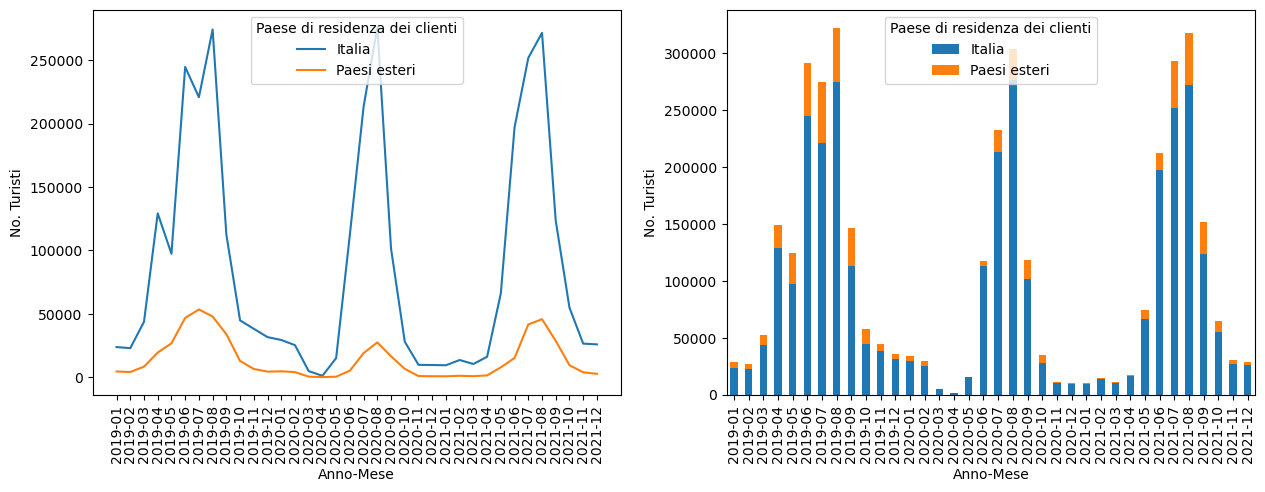

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(RA_turismo_Italia['TIME'], RA_turismo_Italia['Value'], label="Italia")
axes[0].plot(RA_turismo_Paesiesteri['TIME'], RA_turismo_Paesiesteri['Value'], label='Paesi esteri')
axes[0].tick_params(axis='x', labelrotation=90)
axes[0].legend(loc="upper center", title='Paese di residenza dei clienti')
axes[0].set_xlabel('Anno-Mese')
axes[0].set_ylabel('No. Turisti')

pd.concat([RA_turismo_Italia, RA_turismo_Paesiesteri], axis=0).pivot(index='TIME', columns='Paese di residenza dei clienti', values='Value').plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_xlabel('Anno-Mese')
axes[1].set_ylabel('No. Turisti')
axes[1].legend(loc="upper center", title='Paese di residenza dei clienti')

Tourism in Ravenna is highly seasonal and, of the total number of tourists, the incidence of foreigners is minimal.

In [82]:
BO_turismo_Italia = turismo_regioni.loc[(turismo_regioni['Territorio']=='Bologna') & (turismo_regioni['TIPO_DATO7']=='AR') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Italia')]

BO_turismo_Paesiesteri = turismo_regioni.loc[(turismo_regioni['Territorio']=='Bologna') & (turismo_regioni['TIPO_DATO7']=='AR') \
                                             & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                             & (turismo_regioni['Paese di residenza dei clienti']=='Paesi esteri')]

Text(0, 0.5, 'No. Turisti')

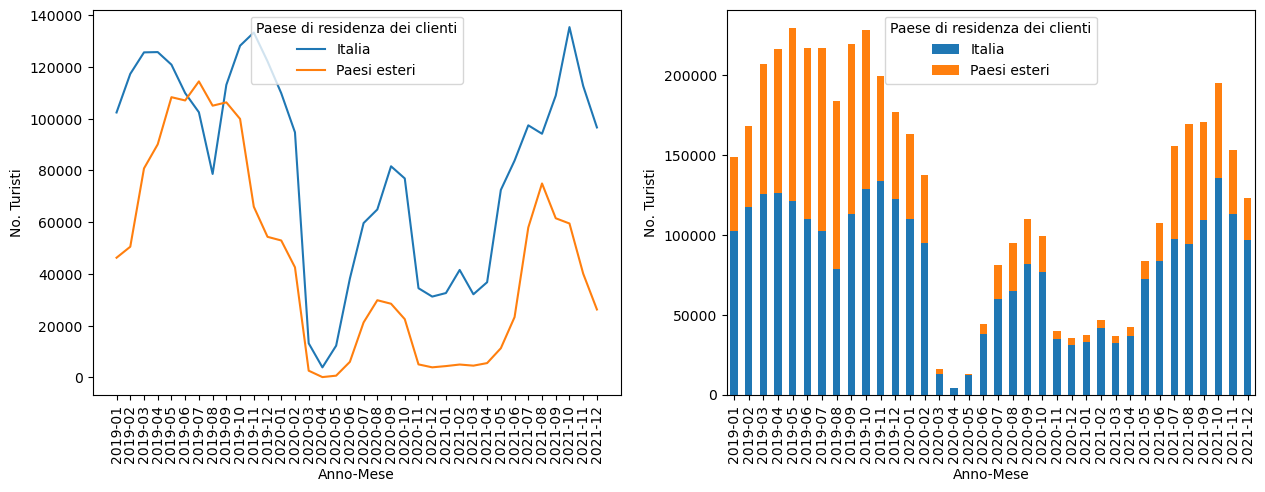

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(BO_turismo_Italia['TIME'], BO_turismo_Italia['Value'], label="Italia")
axes[0].plot(BO_turismo_Paesiesteri['TIME'], BO_turismo_Paesiesteri['Value'], label='Paesi esteri')
axes[0].tick_params(axis='x', labelrotation=90)
axes[0].legend(loc="upper center", title='Paese di residenza dei clienti')
axes[0].set_xlabel('Anno-Mese')
axes[0].set_ylabel('No. Turisti')

pd.concat([BO_turismo_Italia, BO_turismo_Paesiesteri], axis=0).pivot(index='TIME', columns='Paese di residenza dei clienti', values='Value').plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_xlabel('Anno-Mese')
axes[1].set_ylabel('No. Turisti')

The situation in Bologna is different. Tourism is less seasonal and the proportion between Italian and foreign tourists is more balanced. There is also a peak of Italian tourists in October 2021 and a general peak in May 2019.

Which province of Emilia Romagna had the most tourists, Italians and foreigners, in the years 2019-2020-2021?

In [84]:
RA_turismo_Mondo = turismo_regioni.loc[(turismo_regioni['Territorio']=='Ravenna') & (turismo_regioni['TIPO_DATO7']=='AR') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

BO_turismo_Mondo = turismo_regioni.loc[(turismo_regioni['Territorio']=='Bologna') & (turismo_regioni['TIPO_DATO7']=='AR') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

FE_turismo_Mondo = turismo_regioni.loc[(turismo_regioni['Territorio']=='Ferrara') & (turismo_regioni['TIPO_DATO7']=='AR') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

MO_turismo_Mondo = turismo_regioni.loc[(turismo_regioni['Territorio']=='Modena') & (turismo_regioni['TIPO_DATO7']=='AR') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

PC_turismo_Mondo = turismo_regioni.loc[(turismo_regioni['Territorio']=='Piacenza') & (turismo_regioni['TIPO_DATO7']=='AR') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

RN_turismo_Mondo = turismo_regioni.loc[(turismo_regioni['Territorio']=='Rimini') & (turismo_regioni['TIPO_DATO7']=='AR') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

FC_turismo_Mondo = turismo_regioni.loc[(turismo_regioni['Territorio']=='Forlì-Cesena') & (turismo_regioni['TIPO_DATO7']=='AR') \
                                             & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                             & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

RE_turismo_Mondo = turismo_regioni.loc[(turismo_regioni['Territorio']=="Reggio nell'Emilia") & (turismo_regioni['TIPO_DATO7']=='AR') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

PR_turismo_Mondo = turismo_regioni.loc[(turismo_regioni['Territorio']=='Parma') & (turismo_regioni['TIPO_DATO7']=='AR') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]


In [85]:
province_turismo_mondo = pd.concat([RA_turismo_Mondo, BO_turismo_Mondo, FE_turismo_Mondo, MO_turismo_Mondo, PC_turismo_Mondo,\
                                    RN_turismo_Mondo, FC_turismo_Mondo, RE_turismo_Mondo, PR_turismo_Mondo], axis=0)

Text(0, 0.5, 'No. of Tourists MM')

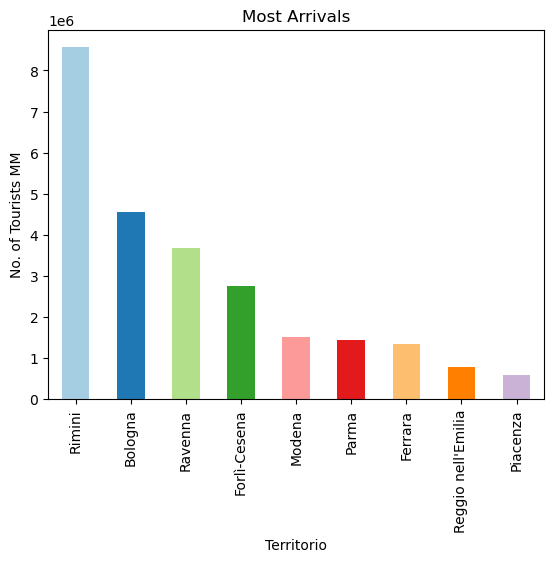

In [86]:
province_turismo_mondo.groupby(["Territorio"]).Value.sum().sort_values(ascending=False).plot.bar(color=plt.cm.Paired(np.arange(len(province_turismo_mondo))), title='Most Arrivals')
plt.ylabel('No. of Tourists MM')

All the graphs produced above refer to data on 'arrivals', which differs from the data on 'presences'. Tourist arrivals are number of customers, both Italian and foreign, hosted in accommodation establishments during the period in question. The tourist presence is the number of nights spent by customers, both Italian and foreign, in accommodation establishments. (ISTAT, https://www.istat.it/it/files//2011/12/glossario1.pdf)

In [87]:
RA_turismo_Mondo_presenze = turismo_regioni.loc[(turismo_regioni['Territorio']=='Ravenna') & (turismo_regioni['TIPO_DATO7']=='NI') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

BO_turismo_Mondo_presenze = turismo_regioni.loc[(turismo_regioni['Territorio']=='Bologna') & (turismo_regioni['TIPO_DATO7']=='NI') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

FE_turismo_Mondo_presenze = turismo_regioni.loc[(turismo_regioni['Territorio']=='Ferrara') & (turismo_regioni['TIPO_DATO7']=='NI') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

MO_turismo_Mondo_presenze = turismo_regioni.loc[(turismo_regioni['Territorio']=='Modena') & (turismo_regioni['TIPO_DATO7']=='NI') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

PC_turismo_Mondo_presenze = turismo_regioni.loc[(turismo_regioni['Territorio']=='Piacenza') & (turismo_regioni['TIPO_DATO7']=='NI') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

RN_turismo_Mondo_presenze = turismo_regioni.loc[(turismo_regioni['Territorio']=='Rimini') & (turismo_regioni['TIPO_DATO7']=='NI') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

FC_turismo_Mondo_presenze = turismo_regioni.loc[(turismo_regioni['Territorio']=='Forlì-Cesena') & (turismo_regioni['TIPO_DATO7']=='NI') \
                                             & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                             & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

RE_turismo_Mondo_presenze = turismo_regioni.loc[(turismo_regioni['Territorio']=="Reggio nell'Emilia") & (turismo_regioni['TIPO_DATO7']=='NI') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

PR_turismo_Mondo_presenze = turismo_regioni.loc[(turismo_regioni['Territorio']=='Parma') & (turismo_regioni['TIPO_DATO7']=='NI') \
                                        & (turismo_regioni['Tipologia di esercizio'] == 'totale esercizi ricettivi')\
                                        & (turismo_regioni['Paese di residenza dei clienti']=='Mondo')]

In [88]:
province_turismo_mondo_presenze = pd.concat([RA_turismo_Mondo_presenze, BO_turismo_Mondo_presenze,\
                                             FE_turismo_Mondo_presenze, MO_turismo_Mondo_presenze, \
                                             PC_turismo_Mondo_presenze, RN_turismo_Mondo_presenze, \
                                             FC_turismo_Mondo_presenze, RE_turismo_Mondo_presenze, PR_turismo_Mondo_presenze], axis=0)

Text(0, 0.5, 'No. of Tourists daM')

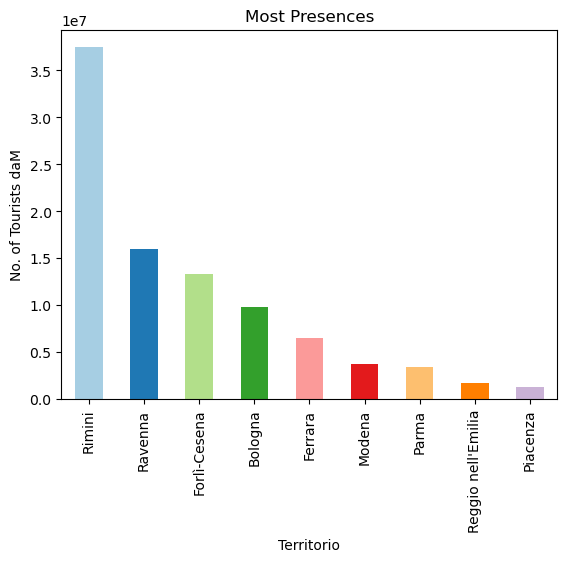

In [89]:
province_turismo_mondo_presenze.groupby(["Territorio"]).Value.sum().sort_values(ascending=False).plot.bar(color=plt.cm.Paired(np.arange(len(province_turismo_mondo))), title='Most Presences')
plt.ylabel('No. of Tourists daM')

I would also have liked to work with data from the year 2022, but I was unable to find a tourism figures dataset similar to the one I used (divided by territories) and furthermore, the data for the year that just passed still seems to be provisional. Just for the sake of it, I briefly analysed a dataset reporting 2022 tourism figures for the entire Italian territory, downloaded again from the __[ISTAT](http://dati.istat.it)__ database. Which month saw the most tourists in terms of arrivals and presences?

Text(0.5, 1.0, 'Most Presences')

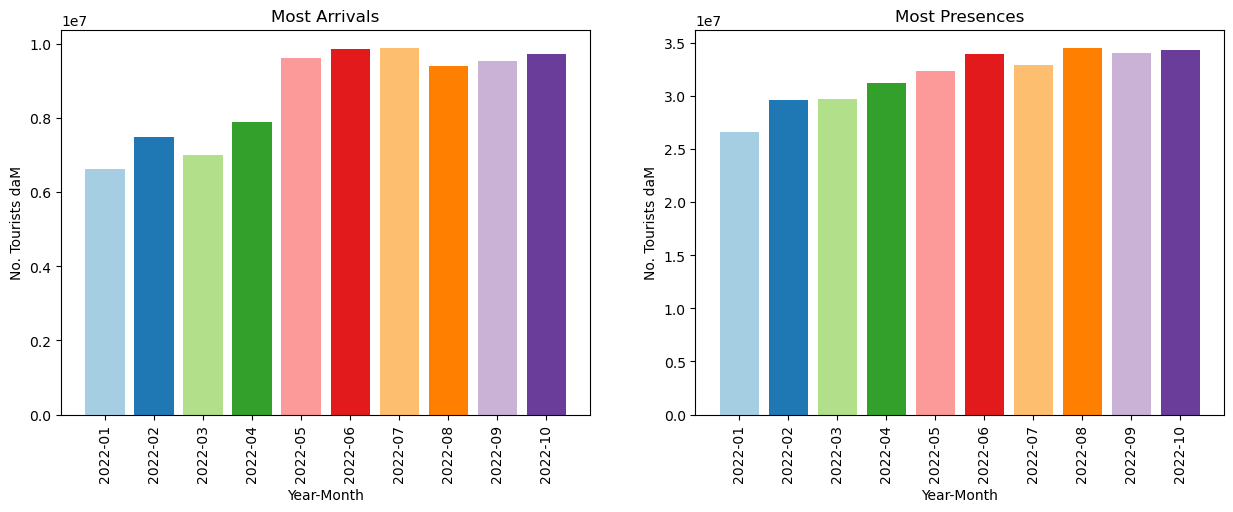

In [90]:
turismo_2022 = pd.read_csv('./DCSC_TUR_16012023114209371.csv')
turismo_2022 = turismo_2022.loc[turismo_2022['TIME'].str.contains('2022')]

turismo_2022_mondo_arrivi = turismo_2022[(turismo_2022['TIPO_DATO7'] == 'AR')\
                                         &(turismo_2022['Paese di residenza dei clienti'] == 'Mondo')\
                                         &(turismo_2022['Correzione'] == 'dati destagionalizzati')\
                                         &(turismo_2022['Ateco 2007'] =='alberghi e strutture simili, alloggi per vacanze e altre strutture per brevi soggiorni, aree di campeggio e aree attrezzate per camper e roulotte')]

turismo_2022_mondo_presenze = turismo_2022[(turismo_2022['TIPO_DATO7'] == 'NI')\
                                           &(turismo_2022['Paese di residenza dei clienti'] == 'Mondo')\
                                           &(turismo_2022['Correzione'] == 'dati destagionalizzati')\
                                           &(turismo_2022['Ateco 2007'] =='alberghi e strutture simili, alloggi per vacanze e altre strutture per brevi soggiorni, aree di campeggio e aree attrezzate per camper e roulotte')]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].bar(turismo_2022_mondo_arrivi['TIME'], turismo_2022_mondo_arrivi['Value'], color=plt.cm.Paired(np.arange(len(province_turismo_mondo))))
axes[0].tick_params(axis='x', labelrotation=90)
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('No. Tourists daM')
axes[0].set_title('Most Arrivals')

axes[1].bar(turismo_2022_mondo_presenze['TIME'], turismo_2022_mondo_presenze['Value'], color=plt.cm.Paired(np.arange(len(province_turismo_mondo))))
axes[1].tick_params(axis='x', labelrotation=90)
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('No. Tourists daM')
axes[1].set_title('Most Presences')

For the analysis in this notebook i only use 'deseasonalized  data', that is to say data to which statistical techniques have been applied to eliminate fluctuations linked to specific periods/seasons due to climate, laws, customs etc. (ISTAT, https://www.istat.it/it/dati-alla-mano/statistica,-perché/cosa-significa). 

## Ravenna

These are other datasets that were interesting to my eyes but did not lend themselves very well to this analysis but which I have an interest in keeping saved for personal use anyway. They were downloaded from the __[Open Data Ravenna](https://opendata.comune.ra.it/dataset/)__ website.

In [91]:
RA_mercati = pd.read_csv('./mercati_ravenna.csv')
RA_serviziricreativi = pd.read_csv('./servizi-ricreativi.csv')
RA_stazioni = pd.read_csv('./stazioni_ferroviarie_ravenna.csv')
RA_Areeverdi = pd.read_csv('./aree_verdi.csv')
RA_Commerciogiustoarte = pd.read_xml('./commerciogustoarte.xml')
RA_Divertimentoerelax = pd.read_xml('./divertimentoerelax.xml')
RA_Musei = pd.read_xml('./musei.xml')
RA_Artecultura = pd.read_xml('./arteecultura.xml')
RA_Parchispiaggepinete = pd.read_xml('./parchispiaggepinete.xml')
RA_itinerarievisite = pd.read_xml('./itinerarievisite.xml')
RA_comearrivare = pd.read_xml('./comearrivare.xml')
RA_ambienteenatura = pd.read_xml('./ambienteenatura.xml')
RA_feedeventi = pd.read_xml('./feed-eventi.xml')